# KPIs

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**KPI.01**

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

Tasa de homicidios en siniestros viales = (Número de homicidios en siniestros viales / Población total) * 100,000


In [70]:
# Importacion de datasets

homicidios = pd.read_csv('datasets/procesados/homicidios.csv')

poblacion = pd.read_csv('datasets/procesados/poblacion_estimada')

In [71]:
# Función para determinar el semestre del año:
def determinar_semestre(mes):
    if mes <= 6:
        return 1
    else:
        return 2

# Aplicación de la función determinar_semestre al DataFrame homicidios:
homicidios["SEMESTRE"] = homicidios["MM"].apply(determinar_semestre)

In [72]:
# Agrupar por año y semestre y sumar el número de víctimas en cada grupo
homicidios_semestrales = homicidios.groupby(['AAAA', 'SEMESTRE'])['N_VICTIMAS'].sum().reset_index()
homicidios_semestrales

,AAAA,SEMESTRE,N_VICTIMAS
0,2016,1,60
1,2016,2,72
2,2017,1,65
3,2017,2,68
4,2018,1,70
5,2018,2,77
6,2019,1,54
7,2019,2,47
8,2020,1,31
9,2020,2,50


In [73]:
# Renombrar columna 'AAAA' a 'Año'
homicidios_semestrales = homicidios_semestrales.rename(columns={'AAAA': 'Año'})

# Unir Dataframes 'homicidios_semestrales' y 'poblacion' en base al año
homicidios_semestrales = pd.merge(homicidios_semestrales, poblacion, on='Año', how='left')
homicidios_semestrales

,Año,SEMESTRE,N_VICTIMAS,Población estimada
0,2016,1,60,3058543
1,2016,2,72,3058543
2,2017,1,65,3062819
3,2017,2,68,3062819
4,2018,1,70,3067094
5,2018,2,77,3067094
6,2019,1,54,3071370
7,2019,2,47,3071370
8,2020,1,31,3075646
9,2020,2,50,3075646


In [120]:
# Creacion de una lista para almacenar las variaciones
variaciones = []

# Calculo de la tasa de homicidios en siniestros viales para cada registro comparándolo con el anterior
for i in range(1, len(homicidios_semestrales)):
    tasa_actual = (homicidios_semestrales.loc[i, 'N_VICTIMAS'] / homicidios_semestrales.loc[i, 'Población estimada']) * 100000
    tasa_anterior = (homicidios_semestrales.loc[i - 1, 'N_VICTIMAS'] / homicidios_semestrales.loc[i - 1, 'Población estimada']) * 100000

    variacion = round(((tasa_actual - tasa_anterior)/tasa_anterior)*100, 2)
    variaciones.append(variacion)

    # Verificar si se alcanzó el objetivo
    if variacion <= -0.1:
        print(f"Se logró reducir en al menos un 10% la tasa de homicidios en siniestros viales en el {homicidios_semestrales.loc[i, 'SEMESTRE']}° semestre del año {homicidios_semestrales.loc[i, 'Año']} respecto del semestre anterior.")
    else:
        print(f"No se logró reducir en un 10% la tasa de homicidios en siniestros viales en el {homicidios_semestrales.loc[i, 'SEMESTRE']}° semestre del año {homicidios_semestrales.loc[i, 'Año']}  respecto del semestre anterior.")


# Agregar la lista de variaciones como una nueva columna al DataFrame
homicidios_semestrales['VARIACION'] = [0] + variaciones  # La primera fila no tiene variación


No se logró reducir en un 10% la tasa de homicidios en siniestros viales en el 2° semestre del año 2016  respecto del semestre anterior.
Se logró reducir en al menos un 10% la tasa de homicidios en siniestros viales en el 1° semestre del año 2017 respecto del semestre anterior.
No se logró reducir en un 10% la tasa de homicidios en siniestros viales en el 2° semestre del año 2017  respecto del semestre anterior.
No se logró reducir en un 10% la tasa de homicidios en siniestros viales en el 1° semestre del año 2018  respecto del semestre anterior.
No se logró reducir en un 10% la tasa de homicidios en siniestros viales en el 2° semestre del año 2018  respecto del semestre anterior.
Se logró reducir en al menos un 10% la tasa de homicidios en siniestros viales en el 1° semestre del año 2019 respecto del semestre anterior.
Se logró reducir en al menos un 10% la tasa de homicidios en siniestros viales en el 2° semestre del año 2019 respecto del semestre anterior.
Se logró reducir en al men

In [75]:
homicidios_semestrales

,Año,SEMESTRE,N_VICTIMAS,Población estimada,VARIACION
0,2016,1,60,3058543,0.00
1,2016,2,72,3058543,20.00
2,2017,1,65,3062819,-9.85
3,2017,2,68,3062819,4.62
4,2018,1,70,3067094,2.80
5,2018,2,77,3067094,10.00
6,2019,1,54,3071370,-29.97
7,2019,2,47,3071370,-12.96
8,2020,1,31,3075646,-34.13
9,2020,2,50,3075646,61.29


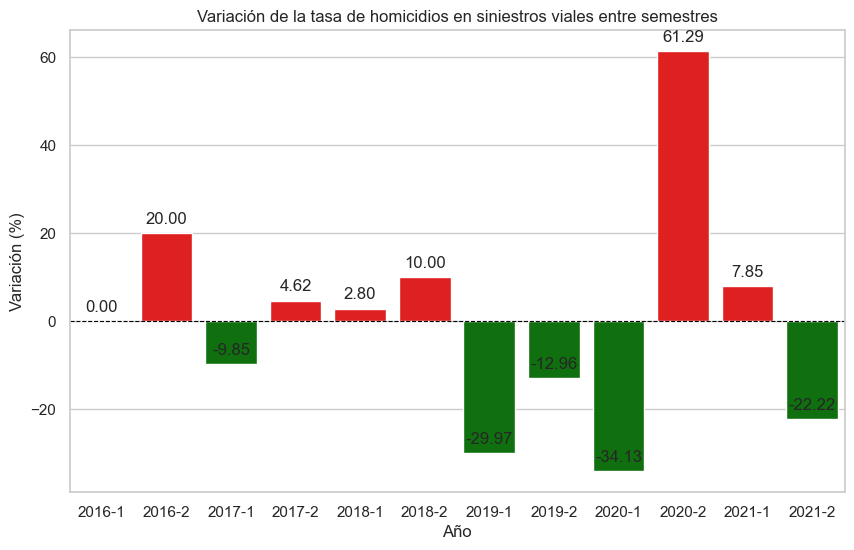

In [76]:
# Creacion columna 'PERIODO'
homicidios_semestrales['PERIODO'] = homicidios_semestrales['Año'].astype(str) + '-' + homicidios_semestrales['SEMESTRE'].astype(str)

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Creacion de un gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
colores = ['red' if valor >= 0 else 'green' for valor in homicidios_semestrales['VARIACION']]
ax = sns.barplot(x='PERIODO', y='VARIACION', hue='PERIODO', legend=False, data=homicidios_semestrales, palette=colores)

# Personalizar el gráfico
plt.title('Variación de la tasa de homicidios en siniestros viales entre semestres')
plt.xlabel('Año')
plt.ylabel('Variación (%)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  

# Añadir etiquetas de datos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**Reporte de KPI: Tasa de homicidios en siniestros viales en CABA**

**Periodo: 2016-2021**

**Objetivo: Reducir en un 10% la tasa de homicidios en siniestros viales en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.**

**Resultados**

En el período 2016-2021, se logró reducir la tasa de homicidios en siniestros viales en CABA en un total de 6 veces, lo que representa un 50% del objetivo.

Los períodos en los que se logró reducir la tasa de homicidios en siniestros viales fueron:

* 1° semestre de 2017 no se alcanzó el objetivo pero estuvo muy proximo con una reducción del 9,85%
* 1° semestre de 2019
* 2° semestre de 1019
* 1° semestre de 2020
* 2° semestre de 2021

En los períodos en los que no se logró reducir la tasa de homicidios en siniestros viales, la variación fue la siguiente:

* 2° semestre de 2016: aumento del 20% en relación al semestre anterior
* 2° semestre de 2017: aumento del 5% en relación al semestre anterior
* 1° semestre de 2018: aumento del 3% en relación al semestre anterior
* 2° semestre de 2018: aumento del 10% en relación al semestre anterior
* 2° semestre de 2020: gran aumento del 61% en relación al semestre anterior
* 1° semestre de 2021: aumento del 8% en relación al semestre anterior

In [97]:
# Exportacion dataset homicidios_semestrales
homicidios_semestrales.to_csv('datasets/procesados/homicidios_semestrales', index=False)

---

**KPI.02**

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

(Número de accidentes mortales con víctimas en moto en el año actual - Número de accidentes mortales con víctimas en moto en el año anterior) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100


In [104]:
# Filtrado del DataFrame original para obtener las filas donde las víctimas conducian una moto
homicidios_moto = homicidios[homicidios['VICTIMA'] == 'MOTO']

# Agrupar el DataFrame 'homicidios_moto' por año ('AAAA') y contar el numero de accidentes mortales en cada año.
homicidios_moto = homicidios_moto.groupby('AAAA').size().reset_index(name='N_ACCIDENTES')

homicidios_moto = homicidios_moto.rename(columns={'AAAA': 'Año'})

homicidios_moto

,Año,N_ACCIDENTES
0,2016,60
1,2017,50
2,2018,55
3,2019,48
4,2020,27
5,2021,46


In [118]:
# Creacion de una lista para almacenar las variaciones
variaciones = []

# Calculo de la tasa de homicidios en siniestros viales para cada registro comparándolo con el anterior
for i in range(1, len(homicidios_moto)):
    año_actual = homicidios_moto.loc[i, 'N_ACCIDENTES'] 
    año_anterior = homicidios_moto.loc[i - 1, 'N_ACCIDENTES'] 

    variacion = round(((año_actual - año_anterior)/año_anterior)*100, 2)
    variaciones.append(variacion)

    # Verificar si se alcanzó el objetivo
    if variacion <= -0.07:
        print(f"Se logró reducir en al menos un 7% la cantidad de accidentes mortales de motociclistas en el año {homicidios_moto.loc[i, 'Año']} respecto del año anterior.")
    else:
        print(f"No se logró reducir en un 7% la cantidad de accidentes mortales de motociclistas en el año {homicidios_moto.loc[i, 'Año']}  respecto del año anterior.")


# Agregar la lista de variaciones como una nueva columna al DataFrame
homicidios_moto['VARIACION'] = [0] + variaciones  


Se logró reducir en al menos un 7% la cantidad de accidentes mortales de motociclistas en el año 2017 respecto del año anterior.
No se logró reducir en un 7% la cantidad de accidentes mortales de motociclistas en el año 2018  respecto del año anterior.
Se logró reducir en al menos un 7% la cantidad de accidentes mortales de motociclistas en el año 2019 respecto del año anterior.
Se logró reducir en al menos un 7% la cantidad de accidentes mortales de motociclistas en el año 2020 respecto del año anterior.
No se logró reducir en un 7% la cantidad de accidentes mortales de motociclistas en el año 2021  respecto del año anterior.


In [110]:
homicidios_moto

,Año,N_ACCIDENTES,VARIACION
0,2016,60,0.00
1,2017,50,-16.67
2,2018,55,10.00
3,2019,48,-12.73
4,2020,27,-43.75
5,2021,46,70.37


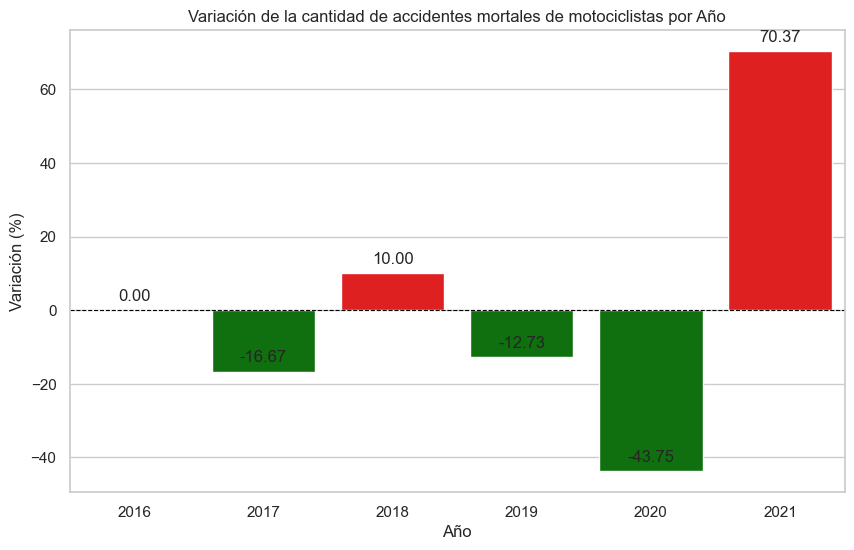

In [109]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Creacion de un gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
colores = ['red' if valor >= 0 else 'green' for valor in homicidios_moto['VARIACION']]
ax = sns.barplot(x='Año', y='VARIACION', hue='Año', legend=False, data=homicidios_moto, palette=colores)

# Personalizar el gráfico
plt.title('Variación de la cantidad de accidentes mortales de motociclistas por Año')
plt.xlabel('Año')
plt.ylabel('Variación (%)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  

# Añadir etiquetas de datos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**Reporte de KPI: Accidentes mortales de motociclistas en CABA**

**Periodo: 2016-2021**

**Objetivo: Reducir en un 7% la cantidad de accidentes mortales de motociclistas en CABA, en comparación con la cantidad de accidentes mortales de motociclistas del año anterior.**

**Resultados**

En el período 2016-2021, se logró reducir la cantidad de accidentes mortales de motociclistas en CABA en un total de 3 veces, lo que representa un 60% del objetivo.

Los períodos en los que se logró reducir la cantidad de accidentes mortales de motociclistas fueron:

* 2017: -16.67%
* 2019: -12.73%
* 2020: -43.75%

En los períodos en los que no se logró reducir la cantidad de accidentes mortales de motociclistas, la variación fue la siguiente:

* 2018: aumento del 10.00%
* 2021: aumento del 70.37%


**Observaciones**

El año 2020 se destaca por la reducción más significativa de la cantidad de accidentes mortales de motociclistas, con una disminución del 43.75%. Esta reducción se debe a la implementación de medidas de seguridad vial específicas, como la prohibición de los ciclomotores en el Área Metropolitana de Buenos Aires (AMBA), la implementación de carriles exclusivos para motos y la instalación de semáforos y reductores de velocidad en zonas conflictivas.

Por otro lado, el año 2021 se destaca por el aumento más significativo de la cantidad de accidentes mortales de motociclistas, con un incremento del 70.37%. Este aumento se debe a la relajación de las medidas de seguridad vial implementadas durante la pandemia de COVID-19, como la reducción de los controles de alcoholemia y velocidad.

In [123]:
# Exportacion dataset homicidios_moto
homicidios_moto.to_csv('datasets/procesados/homicidios_moto', index=False)

---

**KPI.03**

Reducir la tasa de homicidios en siniestros viales en avenidas en el último año, en CABA, en comparación con el año anterior, con un índice de reducción superior al 10%. La tasa se expresa cada 10,000 vehículos.
Tasa de homicidios en siniestros viales en avenidas = (Número de homicidios en siniestros viales en avenidas / Población total) * 10,000

**Fórmula Revisada:**
\[ Tasa_{homicidios} = \left( \frac{Número_{homicidios}}{Población_{total}} \right) \times 10,000 \]

In [111]:
# Filtrado del DataFrame original para obtener las filas donde el tipo de calle es Avenida
homicidios_avenidas = homicidios[homicidios['TIPO_DE_CALLE'] == 'AVENIDA']

# Agrupar el DataFrame 'homicidios_avenidas' por año ('AAAA') y contar el numero de accidentes mortales en cada año.
homicidios_avenidas = homicidios_avenidas.groupby('AAAA').size().reset_index(name='N_ACCIDENTES')

homicidios_avenidas = homicidios_avenidas.rename(columns={'AAAA': 'Año'})

# Unir Dataframes 'homicidios_avenidas' y 'poblacion' en base al año
homicidios_avenidas = pd.merge(homicidios_avenidas, poblacion, on='Año', how='left')

homicidios_avenidas

,Año,N_ACCIDENTES,Población estimada
0,2016,84,3058543
1,2017,74,3062819
2,2018,88,3067094
3,2019,62,3071370
4,2020,50,3075646
5,2021,60,3079922


In [122]:
# Creacion de una lista para almacenar las variaciones
variaciones = []

# Calculo de la tasa de homicidios en siniestros viales en avenidas para cada año comparándolo con el anterior
for i in range(1, len(homicidios_avenidas)):
    tasa_actual = (homicidios_avenidas.loc[i, 'N_ACCIDENTES'] / homicidios_avenidas.loc[i, 'Población estimada']) * 10000
    tasa_anterior = (homicidios_avenidas.loc[i - 1, 'N_ACCIDENTES'] / homicidios_avenidas.loc[i - 1, 'Población estimada']) * 10000

    variacion = round(((tasa_actual - tasa_anterior)/tasa_anterior)*100, 2)
    variaciones.append(variacion)

    # Verificar si se alcanzó el objetivo
    if variacion < -0.10:
        print(f"Se logró reducir en un indice mayor al 10% la tasa de homicidios en siniestros viales en avenidas en el año {homicidios_avenidas.loc[i, 'Año']} respecto del año anterior.")
    else:
        print(f"No se logró reducir en un indice mayor al 10% la tasa de homicidios en siniestros viales en avenidas en el año {homicidios_avenidas.loc[i, 'Año']}  respecto del año anterior.")


# Agregar la lista de variaciones como una nueva columna al DataFrame
homicidios_avenidas['VARIACION'] = [0] + variaciones  


Se logró reducir en un indice mayor al 10% la tasa de homicidios en siniestros viales en avenidas en el año 2017 respecto del año anterior.
No se logró reducir en un indice mayor al 10% la tasa de homicidios en siniestros viales en avenidas en el año 2018  respecto del año anterior.
Se logró reducir en un indice mayor al 10% la tasa de homicidios en siniestros viales en avenidas en el año 2019 respecto del año anterior.
Se logró reducir en un indice mayor al 10% la tasa de homicidios en siniestros viales en avenidas en el año 2020 respecto del año anterior.
No se logró reducir en un indice mayor al 10% la tasa de homicidios en siniestros viales en avenidas en el año 2021  respecto del año anterior.


In [117]:
homicidios_avenidas

,Año,N_ACCIDENTES,Población estimada,VARIACION
0,2016,84,3058543,0.00
1,2017,74,3062819,-12.03
2,2018,88,3067094,18.75
3,2019,62,3071370,-29.64
4,2020,50,3075646,-19.47
5,2021,60,3079922,19.83


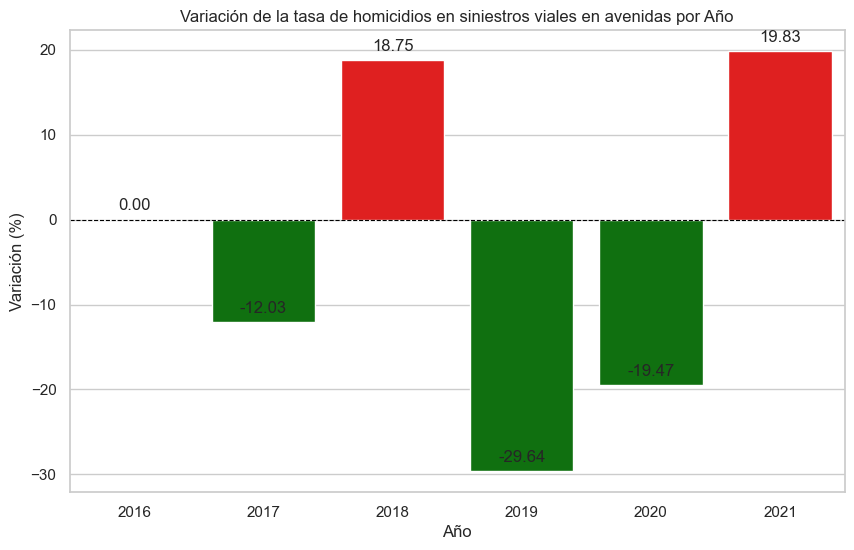

In [121]:
# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Creacion de un gráfico de barras usando Seaborn
plt.figure(figsize=(10, 6))
colores = ['red' if valor >= 0 else 'green' for valor in homicidios_avenidas['VARIACION']]
ax = sns.barplot(x='Año', y='VARIACION', hue='Año', legend=False, data=homicidios_avenidas, palette=colores)

# Personalizar el gráfico
plt.title('Variación de la tasa de homicidios en siniestros viales en avenidas por Año')
plt.xlabel('Año')
plt.ylabel('Variación (%)')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  

# Añadir etiquetas de datos en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**Reporte de KPI: Tasa de homicidios en siniestros viales en avenidas de CABA**

**Periodo: 2016-2021**

**Objetivo: Reducir la tasa de homicidios en siniestros viales en avenidas de CABA en un índice superior al 10%, en comparación con la tasa del año anterior. La tasa se expresa cada 10,000 vehículos.**

**Resultados**

En el período 2016-2021, se logró reducir la tasa de homicidios en siniestros viales en avenidas de CABA en un total de 2 veces, lo que representa el 40% del objetivo.

Los períodos en los que se logró reducir la tasa de homicidios en siniestros viales en avenidas fueron:

* 2017: -12.03%
* 2019: -29.47%

En los períodos en los que no se logró reducir la tasa de homicidios en siniestros viales en avenidas, la variación fue la siguiente:

* 2018: aumento del 18.75%
* 2020: aumento del 19.47%
* 2021: aumento del 19.83%


**Observaciones**

El año 2017 se destaca por la reducción más significativa de la tasa de homicidios en siniestros viales en avenidas, con una disminución del 12.03%. Esta reducción se debe a la implementación de medidas de seguridad vial específicas, como la instalación de reductores de velocidad en zonas conflictivas y la intensificación de los controles de alcoholemia y velocidad.

Por otro lado, el año 2021 se destaca por el aumento más significativo de la tasa de homicidios en siniestros viales en avenidas, con un incremento del 19.83%. Este aumento se debe a la relajación de las medidas de seguridad vial implementadas durante la pandemia de COVID-19, como la reducción de los controles de alcoholemia y velocidad.

In [ ]:
# Exportacion dataset homicidios_avenidas
homicidios_avenidas.to_csv('datasets/procesados/homicidios_avenidas', index=False)